In [3]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import seaborn as sns

Using TensorFlow backend.


In [4]:
train_dir = 'datasets/dataset_new/train'
val_dir = 'datasets/dataset_new/test'

In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [21]:
num_train = len(train_generator.classes) #4846
batch_size = 64
num_val = len(validation_generator.classes) #218

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
MaxPooling2D(pool_size=(2,2)),

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=150,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

Epoch 1/150
19/19 [==============================] - 17s 896ms/step - loss: 0.4204 - accuracy: 0.8274 - val_loss: 0.1628 - val_accuracy: 0.9375
Epoch 2/150
19/19 [==============================] - 18s 955ms/step - loss: 0.2003 - accuracy: 0.9256 - val_loss: 0.2243 - val_accuracy: 0.9545
Epoch 3/150
19/19 [==============================] - 16s 848ms/step - loss: 0.1579 - accuracy: 0.9385 - val_loss: 0.0646 - val_accuracy: 0.9675
Epoch 4/150
19/19 [==============================] - 15s 810ms/step - loss: 0.1271 - accuracy: 0.9504 - val_loss: 0.1467 - val_accuracy: 0.9481
Epoch 5/150
19/19 [==============================] - 16s 850ms/step - loss: 0.0921 - accuracy: 0.9726 - val_loss: 0.1617 - val_accuracy: 0.9479
Epoch 6/150
19/19 [==============================] - 17s 909ms/step - loss: 0.0831 - accuracy: 0.9718 - val_loss: 0.0902 - val_accuracy: 0.9740
Epoch 7/150
19/19 [==============================] - 17s 888ms/step - loss: 0.0680 - accuracy: 0.9745 - val_loss: 0.1072 - val_accuracy:

19/19 [==============================] - 16s 868ms/step - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0.0323 - val_accuracy: 0.9740
Epoch 58/150
19/19 [==============================] - 18s 950ms/step - loss: 0.0166 - accuracy: 0.9932 - val_loss: 0.0583 - val_accuracy: 0.9870
Epoch 59/150
19/19 [==============================] - 15s 776ms/step - loss: 0.0175 - accuracy: 0.9920 - val_loss: 4.1222e-04 - val_accuracy: 0.9870
Epoch 60/150
19/19 [==============================] - 17s 892ms/step - loss: 0.0160 - accuracy: 0.9934 - val_loss: 0.0014 - val_accuracy: 0.9935
Epoch 61/150
19/19 [==============================] - 17s 870ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0263 - val_accuracy: 0.9948
Epoch 62/150
19/19 [==============================] - 17s 918ms/step - loss: 0.0028 - accuracy: 0.9983 - val_loss: 0.0612 - val_accuracy: 0.9935
Epoch 63/150
19/19 [==============================] - 16s 838ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.0132 - val_accuracy: 0

19/19 [==============================] - 18s 930ms/step - loss: 0.0082 - accuracy: 0.9992 - val_loss: 0.0403 - val_accuracy: 0.9844
Epoch 114/150
19/19 [==============================] - 17s 872ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9935
Epoch 115/150
19/19 [==============================] - 16s 842ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 5.2752e-04 - val_accuracy: 1.0000
Epoch 116/150
19/19 [==============================] - 16s 827ms/step - loss: 0.0054 - accuracy: 0.9974 - val_loss: 9.1699e-09 - val_accuracy: 0.9935
Epoch 117/150
19/19 [==============================] - 17s 869ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0018 - val_accuracy: 0.9844
Epoch 118/150
19/19 [==============================] - 17s 920ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9935
Epoch 119/150
19/19 [==============================] - 16s 823ms/step - loss: 0.0013 - accuracy: 0.9991 - val_loss: 0.0021 - val_a

In [45]:
model.save('drowsy_driver/model_eye.h5', overwrite=True)

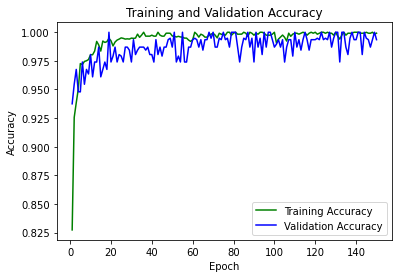

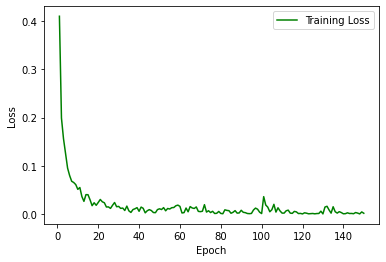

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 151)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
tes_d ='datasets/train'
test_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_gen = test_data.flow_from_directory(
        tes_d,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 4000 images belonging to 2 classes.


In [39]:
model.evaluate(test_gen)

63/63 [==============================] - 8s 125ms/step


[0.8264451622962952, 0.9432500004768372]

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)            